In [1]:
theta1 = [0.31, 0.18, 0.65, 0.25, 5]  # true values
theta_n1 = [0.372, 0.216, 0.78, 0.3, 6.0] # nominal values +20%
theta_min1 = [0.155, 0.09, 0.325, 0.125, 2.5]   # minimum values -50%
theta_max1 = [0.465, 0.27, 0.975, 0.375, 7.5]  # maximum values +50%
theta_maxs1 = [hi / nom for hi, nom in zip(theta_max1, theta_n1)]
theta_mins1 = [lo / nom for lo, nom in zip(theta_min1, theta_n1)]

In [14]:
system = {
    'tvi': {  # Time-variant input variables (models input: tvi), each key is a symbol nad key in tvi as well
        'u1': {  # Temperature (K)
            'stps': 5,  # Number of switching times in CVPs (vector parametrisation resolution in time dimension):
            # Must be a positive integer > 1. swps-1 is the number of steps
            'const': 'rel',  # Constraint type: relative state of signal levels in CVPs
            # 'rel' (relative) ensures relaxation, 'dec' (decreasing) ensures decreasing signal levels, 'inc' (increasing) ensures increasing signal levels
            'max': 0.2,  # Maximum allowable signal level, des_opt space upper bound
            'min': 0.05,  # Minimum allowable signal level, des_opt space lower bound
            'cvp': 'CPF',  # Design CVP method (CPF - constant profile, LPF - linear profile)
            'offl': 0.01,  # minimum allowed perturbation of signal (ratio)
            'offt': 0.5  # minimum allowed perturbation of time (ratio)
        },
        'u2': {  # Temperature (K)
            'stps': 5,  # Number of switching times in CVPs (vector parametrisation resolution in time dimension):
            # Must be a positive integer > 1. swps-1 is the number of steps
            'const': 'dec',  # Constraint type: relative state of signal levels in CVPs
            # 'rel' (relative) ensures relaxation, 'dec' (decreasing) ensures decreasing signal levels, 'inc' (increasing) ensures increasing signal levels
            'max': 35,  # Maximum allowable signal level, des_opt space upper bound
            'min': 5,  # Minimum allowable signal level, des_opt space lower bound
            'cvp': 'CPF',  # Design CVP method (CPF - constant profile, LPF - linear profile)
            'offl': 5,  # minimum allowed perturbation of signal (ratio)
            'offt': 0.5  # minimum allowed perturbation of time (ratio)
        },
    },
    'tvo': {  # Time-variant output variables (responses, measured or unmeasured)
        'y1': {  # response variable, here carbonation efficiency
            'init': 0,  # Initial value for the response variable, it can be a value, or 'variable' for case it is a des_opt decision (time-invariant input variable)
            'meas': True,  # Flag indicating if this variable is directly measurable, if False, it is a virtual output
            'sp': 6,  # the amound of samples per each round (run)
            'unc': 0.05,  # amount of noise (standard deviation) in the measurement, in case of insilico, this is used for simulating a normal distribution of noise to measurement (only measurement)
            'offt': 0.5,  # minimum allowed perturbation of sampling times (ratio)
            'samp_s': 1,  # Matching criterion for models prediction and data alignment
            'samp_f': [0, 10],  # fixed sampling times
        },
        'y2': {  # response variable, here carbonation efficiency
            'init': 0,  # Initial value for the response variable, it can be a value, or 'variable' for case it is a des_opt decision (time-invariant input variable)
            'meas': True,  # Flag indicating if this variable is directly measurable, if False, it is a virtual output
            'sp': 6,  # the amound of samples per each round (run)
            'unc': 0.05,  # amount of noise (standard deviation) in the measurement, in case of insilico, this is used for simulating a normal distribution of noise to measurement (only measurement)
            'offt': 0.5,  # minimum allowed perturbation of sampling times (ratio)
            'samp_s': 1,  # Matching criterion for models prediction and data alignment
            'samp_f': [0, 10],  # fixed sampling times
        },
    },
    'tii': {  # Time-invariant input variables (tii)
        'y10': {  # 1st symbolic time-invariant control, Density of solid reactant (kg/m³)
            'max': 10,  # Maximum allowable signal level, des_opt space upper bound
            'min': 1  # Minimum allowable signal level, des_opt space upper bound
        },
        'y20': {  # 1st symbolic time-invariant control, Density of solid reactant (kg/m³)
            'max': 10,  # Maximum allowable signal level, des_opt space upper bound
            'min': 1  # Minimum allowable signal level, des_opt space upper bound
        },
    },
    'tio': {  # Time-invariant output variables (empty here, could hold steady state responses that hold no dependency)
    },
    't_s': [0, 10],  # Time span  (600 s to 10,800 s), duration of numerical perturbations (the rest is precluded from des_opt)
    't_r': 0.02,  # Time resolution (10 s), minimum time steps for the simulation/des_opt/controls
    't_d': 0.5
}

In [15]:
models = { # Settings related to the rival models and their parameters
    'can_m': ['M'],  # Active solvers (rival models) to be used in the experiment
    'krt': {'M': 'pys'},  # Kernel type for each model, 'pys' for python standalone scripts, 'pym' for middoe.krnl_models, 'gpr' for gPAS models
    # type of the model interface, 'pym' for middoe.krnl_models, 'gpr' for gPAS models, function name for globally defined functions, 'pys' for python standalone scripts
    'creds': {'M': '@@TTmnoa698'},
    # credentials for gPAS models, if not needed, leave empty
    'src': {'M': 'C:/Users/Tadmin/PycharmProjects/middoe/tests/case study 2 poster/model.py'},
    # for now for gPAS readable files, or python standalone scripts

    'theta': { # Theta parameters for each models
        'M': theta_n1
    },
    't_u': { # Maximum bounds for theta parameters (based on normalized to'f20': theta20mins, 1)
        'M': theta_maxs1
    },
    't_l': { # Minimum bounds for theta parameters (based on normalized to 1)
        'M': theta_mins1
    }
}

In [16]:
des_opt = { # Design settings for the experiment
    'eps': 1e-3, #perturbation size of parameters in SA FDM method (in a normalized to 1 space)
    'meth': 'L',  # optimisation method, 'G': Global Differential Evolution, 'L': Local Pattern Search, 'GL': Global Differential Evolution refined with Local Pattern Search
    'md_ob': 'BFF',     # MD optimality criterion, 'HR': Hunter and Reiner, 'BFF': Buzzi-Ferraris and Forzatti
    'pp_ob': 'E',  # PP optimality criterion, 'D', 'A', 'E', 'ME'
    'plt': True,  # Plot the results
    'itr': {
        'pps': 30, # population size
        'maxmd': 60, # maximum number of MD runs
        'tolmd': 1, # tolerance for MD optimization
        'maxpp':20 ,# maximum number of PP runs
        'tolpp': 1, # tolerance for PP optimization
    }
}

In [5]:
from middoe.des_pp import mbdoe_pp
designs = mbdoe_pp(des_opt, system, models, round=1, num_parallel_runs=16)


KeyboardInterrupt



In [5]:
insilicos = { # Settings for the insilico data generation
    'tr_m': 'M', # selected true models (with nominal values)
    'theta': theta1,
    'errt': 'rel',  # error type, 'rel' for relative error, 'abs' for absolute error
    'prels': { # classic des_opt settings, sheet name is the round run name, each sheet contains the data for the round, iso space.
    }
}

In [8]:
from middoe.krnl_expera import expera
expera(system, models, insilicos, designs, expr=1, swps=designs['swps'])


[✓] In-silico data saved to: C:\Users\Tadmin\PycharmProjects\middoe\tests\case study 2 poster\indata.xlsx
[INFO] Model used         : M
[INFO] Design case        : MBDoE
[INFO] Responses simulated:
   - y1         | measurable      | std.dev = 0.05
   - y2         | measurable      | std.dev = 0.05


(WindowsPath('C:/Users/Tadmin/PycharmProjects/middoe/tests/case study 2 poster/indata.xlsx'),
      MES_X:y1  MES_Y:y1  MES_E:y1  MES_X:y2  MES_Y:y2  MES_E:y2  X:all  \
 0        0.00  1.302555  0.065545      0.00  6.548584  0.347786   0.00   
 1        4.30  0.397349  0.019432      4.30  6.306942  0.304691   0.02   
 2        5.60  0.279253  0.014293      5.60  5.735824  0.301126   0.04   
 3        7.96  0.173076  0.008496      7.96  6.485281  0.298428   0.06   
 4        9.50  0.108034  0.005417      9.50  5.599493  0.298059   0.08   
 ..        ...       ...       ...       ...       ...       ...    ...   
 496       NaN       NaN       NaN       NaN       NaN       NaN   9.92   
 497       NaN       NaN       NaN       NaN       NaN       NaN   9.94   
 498       NaN       NaN       NaN       NaN       NaN       NaN   9.96   
 499       NaN       NaN       NaN       NaN       NaN       NaN   9.98   
 500       NaN       NaN       NaN       NaN       NaN       NaN  10.00   
 
    

In [6]:
from middoe.log_utils import  read_excel
data = read_excel('indata')

[INFO] Reading from indata.xlsx


In [7]:
iden_opt = { # Settings for the parameter estimation process
    'meth': 'Ls',  # optimisation method, 'G': Global Differential Evolution, 'Ls': Local SLSQP, 'Ln': Local Nelder-Mead
    'init': None,   # use 'rand' to have random starting point and use None to start from theta_parameters nominal values (to be avoided in insilico studies)
    'eps': 1e-4,  # perturbation size of parameters in SA FDM method (in a normalized to 1 space)
    #usually 1e-3, or None to perform a mesh independency test, and auto adjustment
    'ob': 'WLS',  #loss function, 'LS': least squares, 'MLE': maximum likelihood, 'Chi': chi-square, 'WLS': weighted least squares
    'c_plt': True, # plot the confidence volumes
    'f_plt': True, # plot the fitting results
    'plt_s': True, # show plots while saving
    'log': True # log the results
}

In [8]:
from middoe.iden_parmest import parmest
resultpr = parmest(system, models, iden_opt, data)

Objective function: 'WLS'| model 'M' | CPU time 0.0645 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0564 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0579 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0584 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0776 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0617 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0672 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0724 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0679 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0682 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0662 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0705 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0605 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0580 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0593 seconds.
Objective function: 'WLS'| model 'M' | C

C:\Users\Tadmin\PycharmProjects\middoe\.venv\Lib\site-packages\scipy\optimize\_differentiable_functions.py:231: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Objective function: 'WLS'| model 'M' | CPU time 0.2014 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1102 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2503 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1915 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1816 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1318 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2792 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.2539 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1351 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1792 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1785 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1505 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1496 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1094 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1276 seconds.
Objective function: 'WLS'| model 'M' | C

In [9]:
from middoe.iden_uncert import uncert
uncert_results = uncert(data, resultpr, system, models, iden_opt)
resultun = uncert_results['results']
theta_parameters = uncert_results['theta_parameters']
solver_parameters = uncert_results['solver_parameters']
scaled_params = uncert_results['scaled_params']
obs = uncert_results['obs']

Estimated parameters of M: [0.2695838541927334, 0.14063972025372792, 0.5874686055676064, 0.26830011989079, 4.654738359957821]
True parameters of M: [0.372, 0.216, 0.78, 0.3, 6.0]
LS objective function value for M: 0.18859640628843113
T-values of model M: [0.01153038 0.004044   0.04761799 0.51453615 0.00883664]
P-value of model:M is 100.0 for model discrimination
R2 values for responses in model M:
  y1: 0.9959
  y2: 0.9892


Estimability analysis for round 1 is running
Parameter ranking from most estimable to least estimable for M in round 1: [3, 0, 2, 1, 4]
J_theta : 75.43856251537245
P-value of model:M is 100.0 for model discrimination
J_k 1 parameters: 78.70997690148327
rC 1 parameters: 0.817853596527705
rCKub parameters: 0.272617865509235
rCC parameters: -0.24246071149692164
P-value of model:M is 100.0 for model discrimination
J_k 2 parameters: 76.29756929318971
rC 2 parameters: 0.28633559260575225
rCKub parameters: 0.1145342370423009
rCC parameters: -0.22136644073942477
P-value of model:M is 100.0 for model discrimination
J_k 3 parameters: 75.997462753397
rC 3 parameters: 0.27945011901227446
rCKub parameters: 0.13972505950613723
rCC parameters: -0.1433791567489771
P-value of model:M is 100.0 for model discrimination
J_k 4 parameters: 77.71189419975931
rC 4 parameters: 2.2733316843868607
rCKub parameters: 1.515554456257907
rCC parameters: 0.042962871354825585


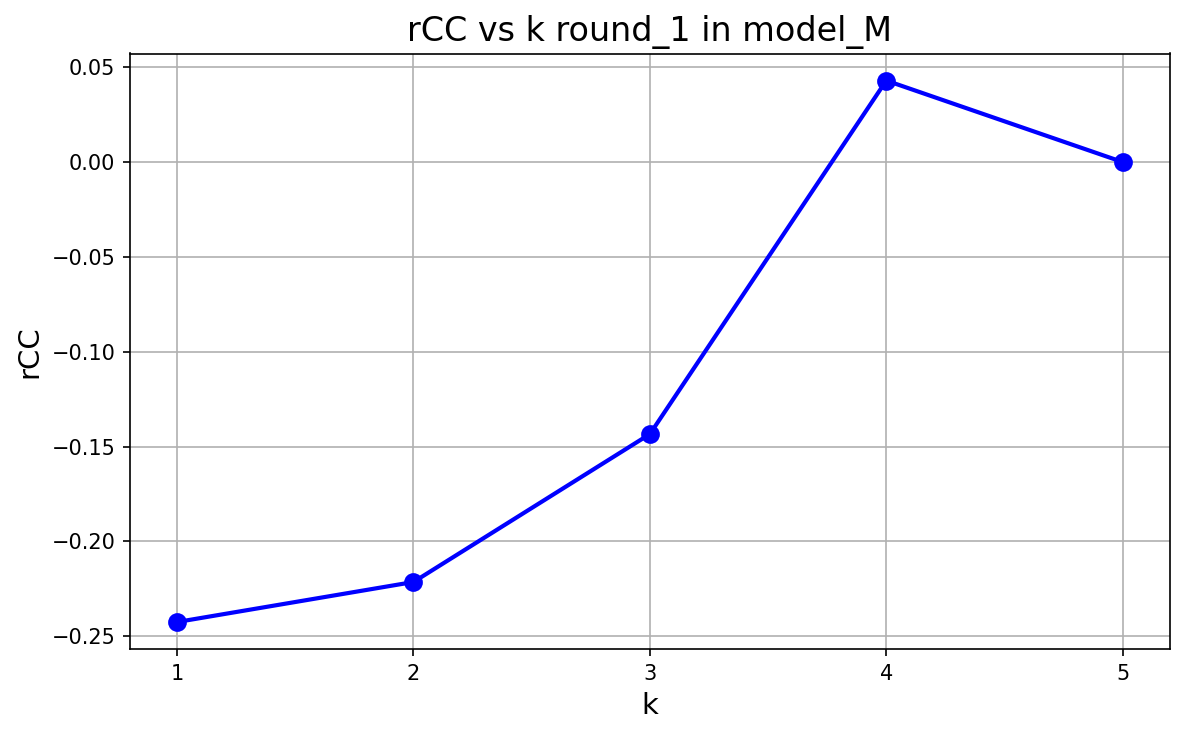

Optimal number of parameters to estimate for M: 1


In [10]:
from middoe.sc_estima import estima
j = 1
ranking, k_optimal_value, rCC_values, J_k_values, best_uncert_result = estima(resultun, system, models, iden_opt, j, data)

C:\Users\Tadmin\PycharmProjects\middoe\middoe\iden_utils.py:531: RuntimeWarning: invalid value encountered in sqrt
  width, height = 2 * np.sqrt(vals)


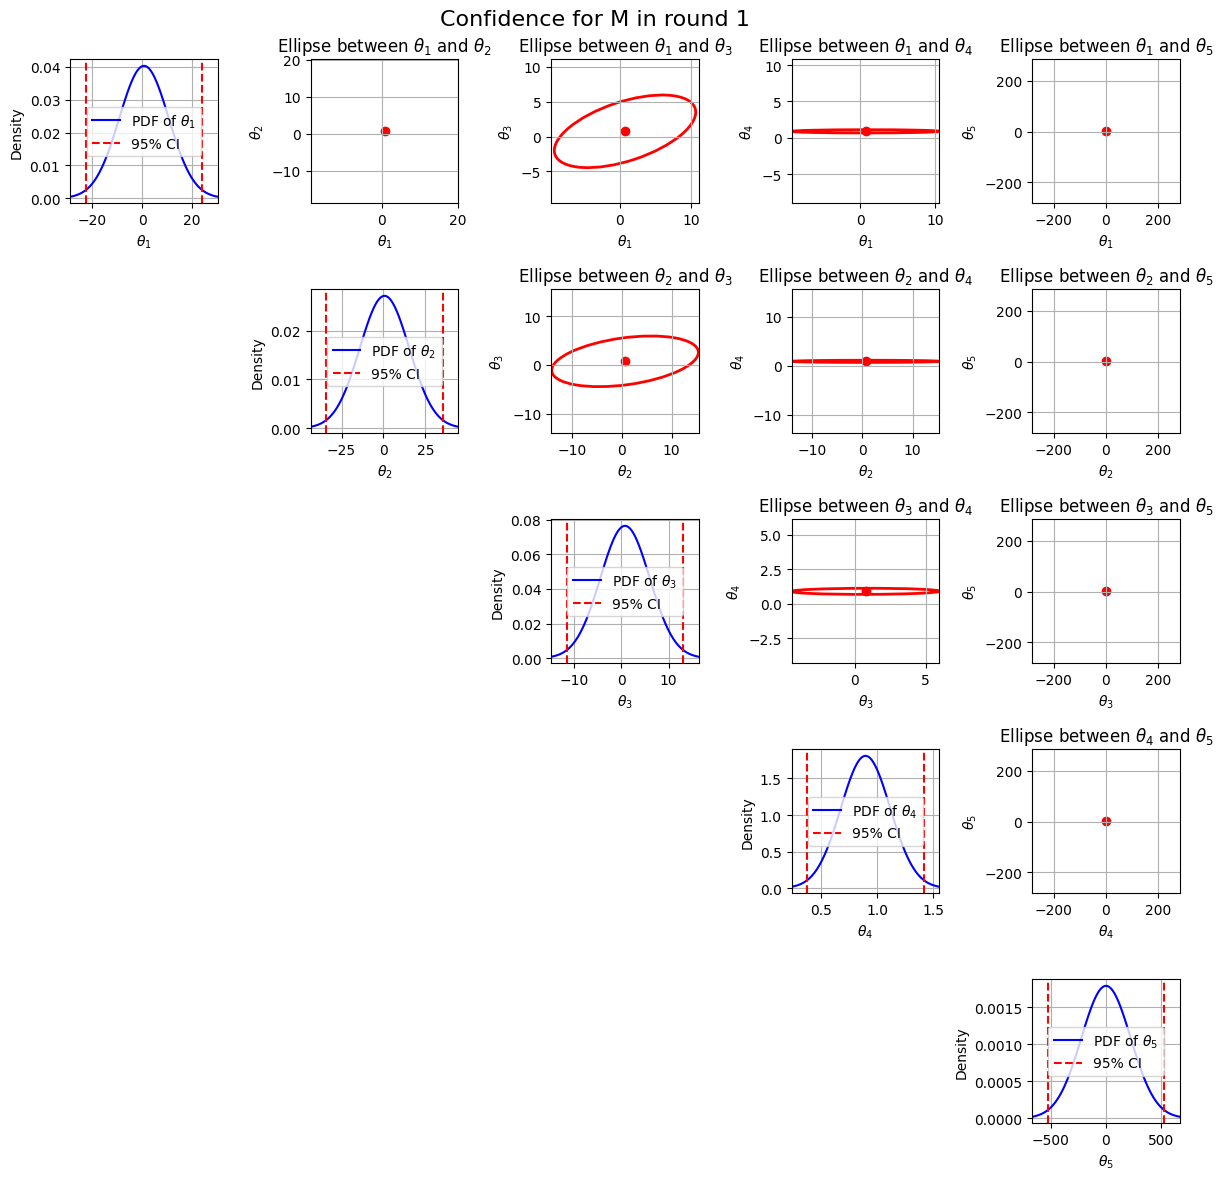

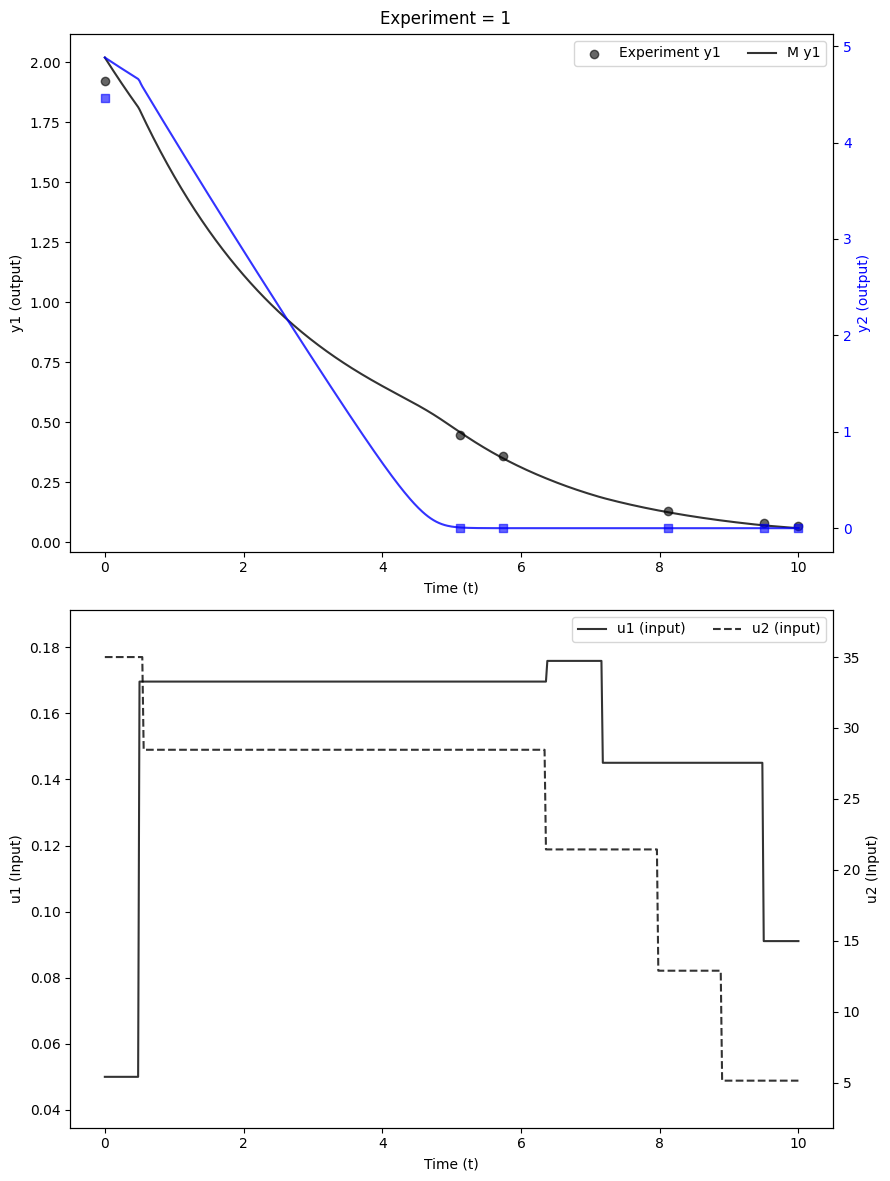

reference t value for model M and round 1: 2.3646242515927844
estimated t values for model M and round 1: [0.01153038 0.004044   0.04761799 0.51453615 0.00883664]
P-value for model M and round 1: 100.0
eps for model M and round 1: 0.0001



{'M': np.float64(2.3646242515927844)}

In [11]:
from middoe.log_utils import  save_rounds
round_data={}
round = 1
save_rounds(round, resultun, theta_parameters, 'preliminary', round_data, models, scaled_params,iden_opt,solver_parameters, obs, data, system, ranking= ranking, k_optimal_value= k_optimal_value, rCC_values= rCC_values, J_k_values= J_k_values, best_uncert_result=best_uncert_result)

In [13]:
from middoe.des_pp import mbdoe_pp
designs = mbdoe_pp(des_opt, system, models, round=2, num_parallel_runs=16)

In [15]:
from middoe.krnl_expera import expera
expera(system, models, insilicos, designs, expr=2, swps=designs['swps'])


[✓] In-silico data saved to: C:\Users\Tadmin\PycharmProjects\middoe\tests\case study 2 poster\indata.xlsx
[INFO] Model used         : M
[INFO] Design case        : MBDoE
[INFO] Responses simulated:
   - y1         | measurable      | std.dev = 0.05
   - y2         | measurable      | std.dev = 0.05


(WindowsPath('C:/Users/Tadmin/PycharmProjects/middoe/tests/case study 2 poster/indata.xlsx'),
      MES_X:y1  MES_Y:y1  MES_E:y1  MES_X:y2  MES_Y:y2  MES_E:y2  X:all  \
 0        0.00  8.263495  0.421423      0.00  7.682550  0.366900   0.00   
 1        0.50  7.483522  0.374545      0.50  6.451456  0.328009   0.02   
 2        4.52  3.704833  0.178520      4.52  3.389717  0.175050   0.04   
 3        5.90  2.732780  0.144634      5.90  3.489614  0.171178   0.06   
 4        9.50  1.679389  0.084525      9.50  3.272042  0.163477   0.08   
 ..        ...       ...       ...       ...       ...       ...    ...   
 496       NaN       NaN       NaN       NaN       NaN       NaN   9.92   
 497       NaN       NaN       NaN       NaN       NaN       NaN   9.94   
 498       NaN       NaN       NaN       NaN       NaN       NaN   9.96   
 499       NaN       NaN       NaN       NaN       NaN       NaN   9.98   
 500       NaN       NaN       NaN       NaN       NaN       NaN  10.00   
 
    

In [12]:
data = read_excel('indata')

[INFO] Reading from indata.xlsx


In [13]:
iden_opt = { # Settings for the parameter estimation process
    'meth': 'Ls',  # optimisation method, 'G': Global Differential Evolution, 'Ls': Local SLSQP, 'Ln': Local Nelder-Mead
    'init': None,   # use 'rand' to have random starting point and use None to start from theta_parameters nominal values (to be avoided in insilico studies)
    'eps': 1e-4,  # perturbation size of parameters in SA FDM method (in a normalized to 1 space)
    #usually 1e-3, or None to perform a mesh independency test, and auto adjustment
    'ob': 'WLS',  #loss function, 'LS': least squares, 'MLE': maximum likelihood, 'Chi': chi-square, 'WLS': weighted least squares
    'c_plt': True, # plot the confidence volumes
    'f_plt': True, # plot the fitting results
    'plt_s': True, # show plots while saving
    'log': True # log the results
}

In [17]:
theta_n1 = [0.2695838541927334, 0.14063972025372792, 0.5874686055676064, 0.26830011989079, 4.654738359957821] # nominal values +20%
theta_min1 = [0.155, 0.09, 0.325, 0.125, 2.5]   # minimum values -50%
theta_max1 = [0.465, 0.27, 0.975, 0.375, 7.5]  # maximum values +50%
theta_maxs1 = [hi / nom for hi, nom in zip(theta_max1, theta_n1)]
theta_mins1 = [lo / nom for lo, nom in zip(theta_min1, theta_n1)]

In [18]:
resultpr = parmest(system, models, iden_opt, data)

Objective function: 'WLS'| model 'M' | CPU time 0.1066 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1071 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0985 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1077 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0990 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1034 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1093 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1049 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1076 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1116 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1107 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1082 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1165 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1099 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1175 seconds.
Objective function: 'WLS'| model 'M' | C

C:\Users\Tadmin\PycharmProjects\middoe\.venv\Lib\site-packages\scipy\optimize\_differentiable_functions.py:231: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Objective function: 'WLS'| model 'M' | CPU time 0.1078 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1025 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1065 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1055 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1046 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1037 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1096 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1079 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0993 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1000 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1041 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.0981 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1428 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1183 seconds.
Objective function: 'WLS'| model 'M' | CPU time 0.1287 seconds.
Objective function: 'WLS'| model 'M' | C

In [19]:
from middoe.iden_uncert import uncert
uncert_results = uncert(data, resultpr, system, models, iden_opt)
resultun = uncert_results['results']
theta_parameters = uncert_results['theta_parameters']
solver_parameters = uncert_results['solver_parameters']
scaled_params = uncert_results['scaled_params']
obs = uncert_results['obs']

Estimated parameters of M: [0.2853897649782418, 0.20452418228302016, 0.5855974733823689, 0.22667381437196427, 4.885427963327883]
True parameters of M: [0.372, 0.216, 0.78, 0.3, 6.0]
LS objective function value for M: 0.5104823868875862
T-values of model M: [2.95083408 0.58651441 3.40493904 6.39735122 4.01226719]
P-value of model:M is 100.0 for model discrimination
R2 values for responses in model M:
  y1: 0.9980
  y2: 0.9958


Estimability analysis for round 2 is running
Parameter ranking from most estimable to least estimable for M in round 2: [0, 3, 2, 1, 4]
J_theta : 204.1929547550344
P-value of model:M is 100.0 for model discrimination
J_k 1 parameters: 1725.8171957776362
rC 1 parameters: 380.40606025565046
rCKub parameters: 379.40606025565046
rCC parameters: 63.06767670927508
P-value of model:M is 100.0 for model discrimination
J_k 2 parameters: 934.0896935538655
rC 2 parameters: 243.2989129329437
rCKub parameters: 242.2989129329437
rCC parameters: 30.16236411661796
P-value of model:M is 100.0 for model discrimination
J_k 3 parameters: 405.19457873835245
rC 3 parameters: 100.50081199165902
rCKub parameters: 99.50081199165902
rCC parameters: 8.208400999304917
P-value of model:M is 100.0 for model discrimination
J_k 4 parameters: 1533.8482808638234
rC 4 parameters: 1329.655326108789
rCKub parameters: 1328.655326108789
rCC parameters: 55.31897192119954


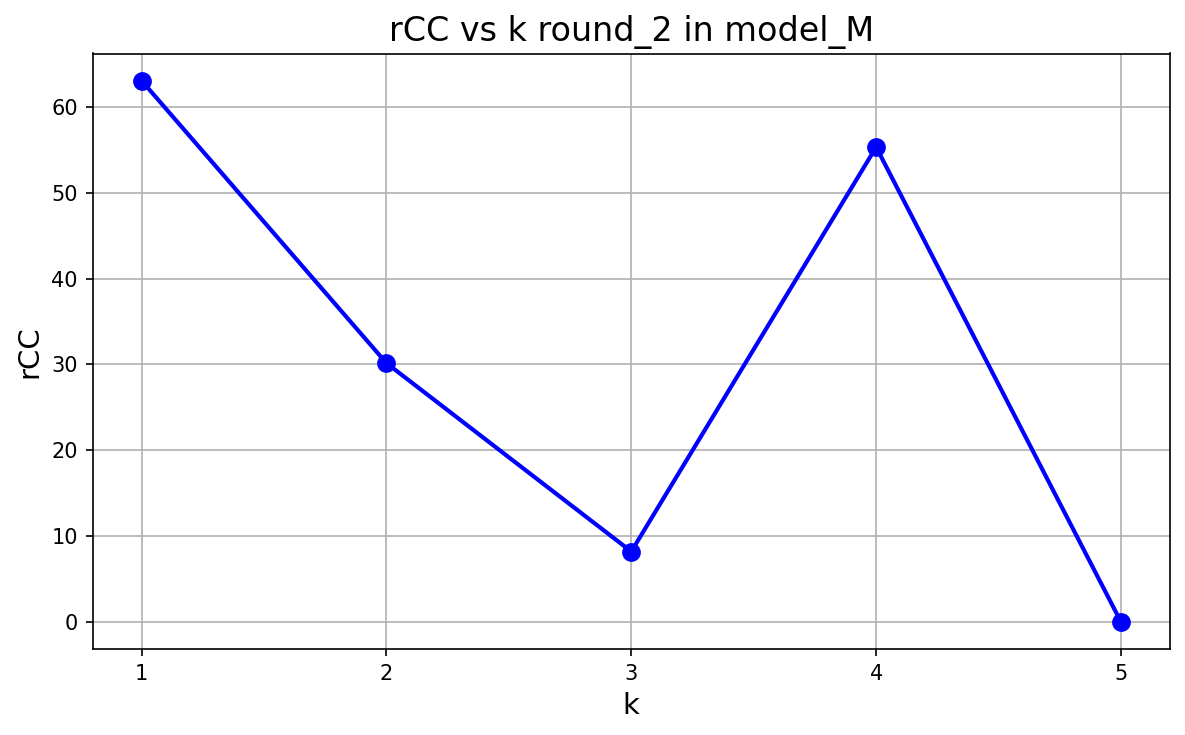

Optimal number of parameters to estimate for M: 5


In [20]:
j = 2
ranking, k_optimal_value, rCC_values, J_k_values, best_uncert_result = estima(resultun, system, models, iden_opt, j, data)

C:\Users\Tadmin\PycharmProjects\middoe\middoe\iden_utils.py:531: RuntimeWarning: invalid value encountered in sqrt
  width, height = 2 * np.sqrt(vals)


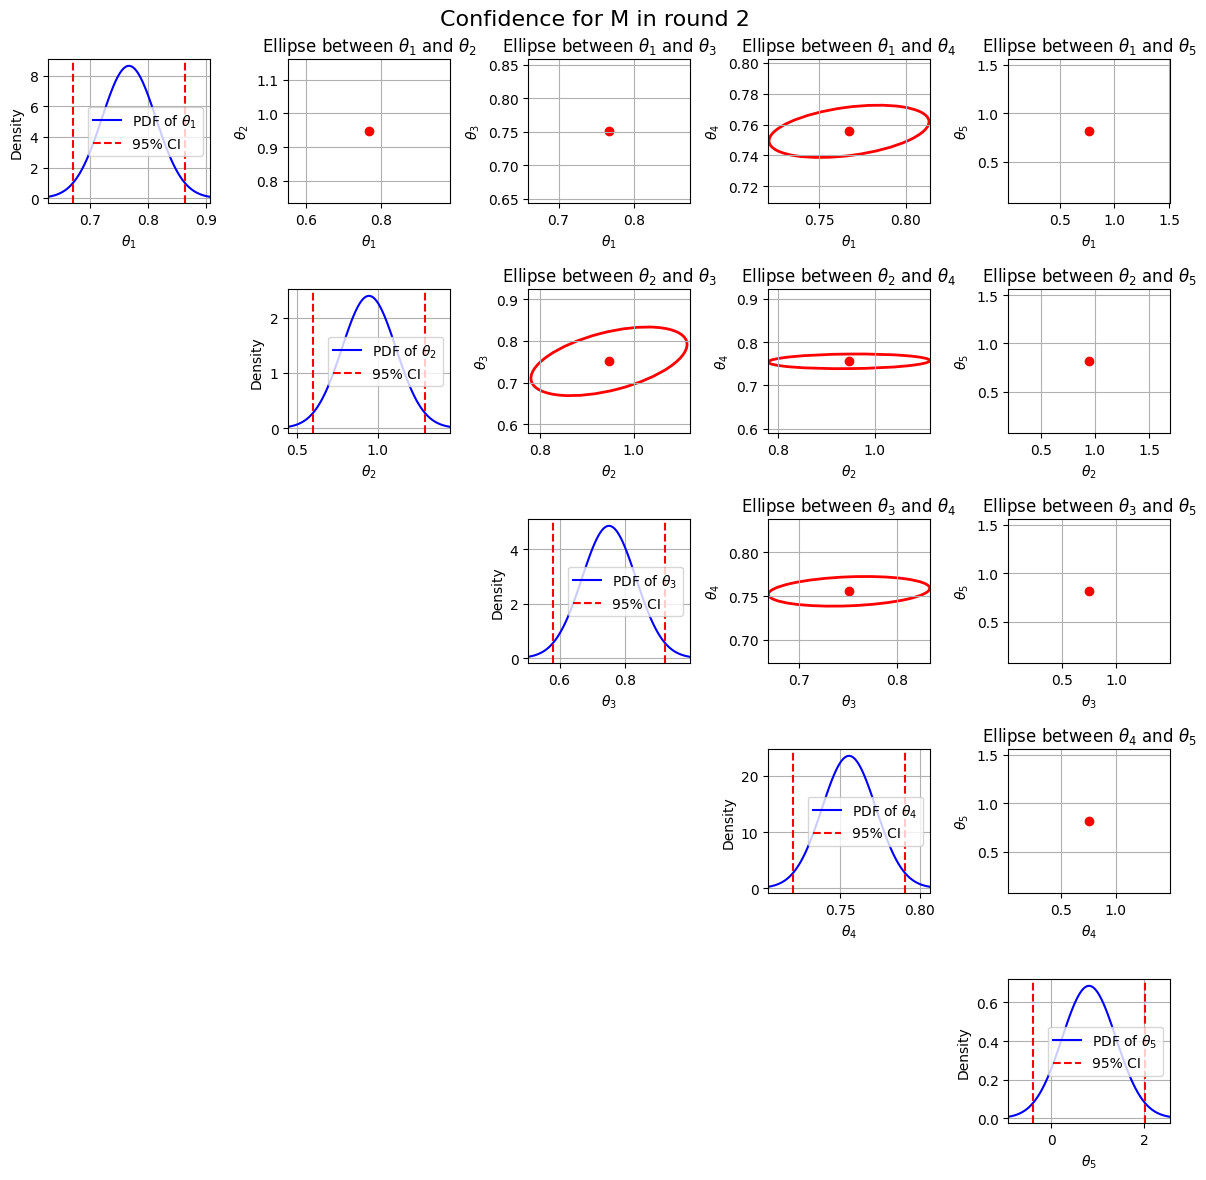

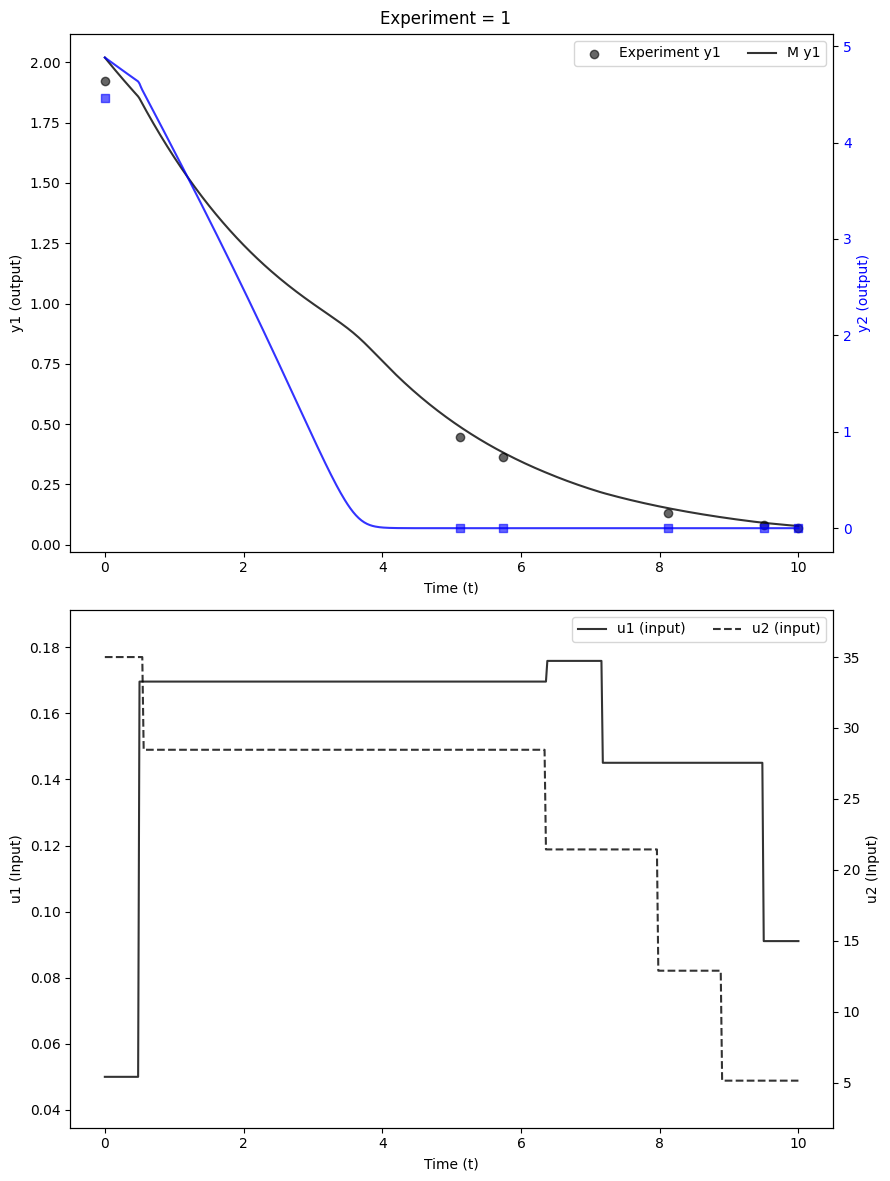

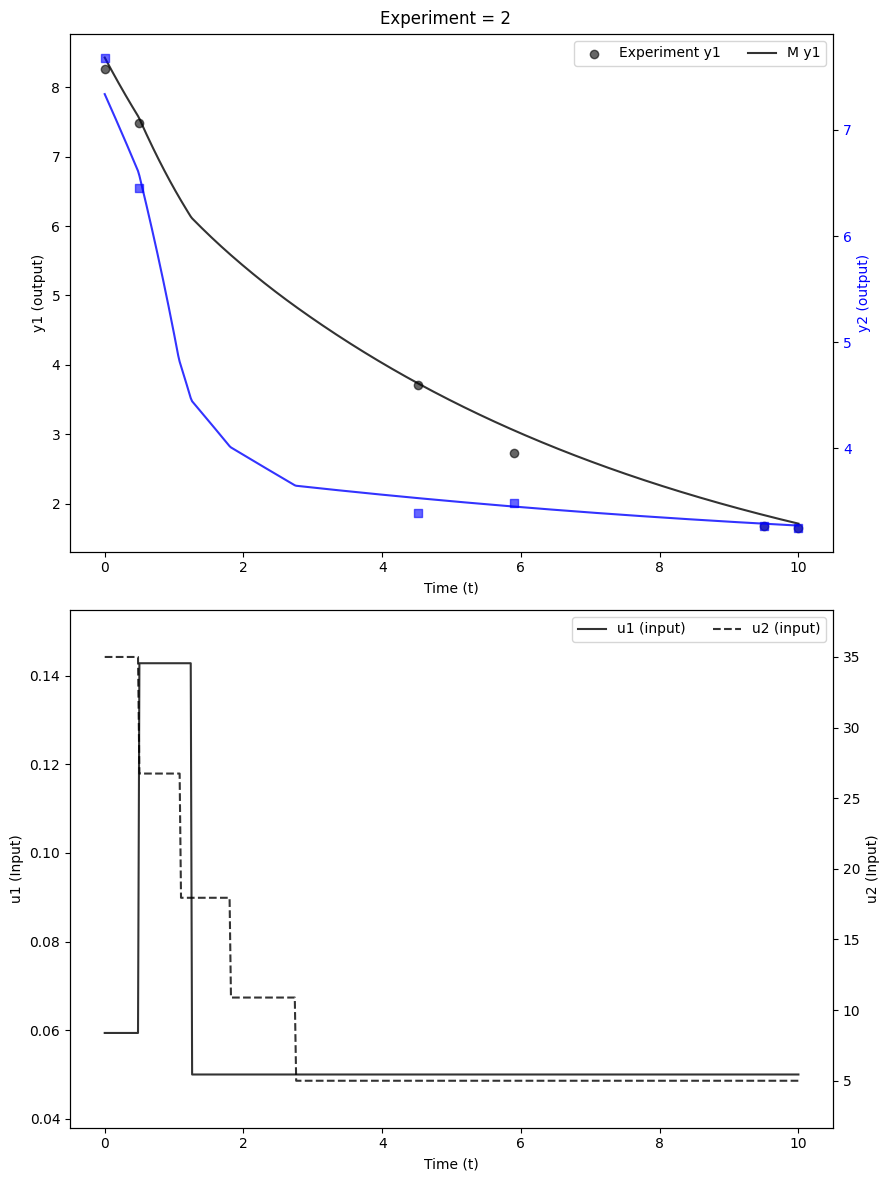

reference t value for model M and round 2: 2.093024054408263
estimated t values for model M and round 2: [2.95083408 0.58651441 3.40493904 6.39735122 4.01226719]
P-value for model M and round 2: 100.0
eps for model M and round 2: 0.0001



{'M': np.float64(2.093024054408263)}

In [21]:
round_data={}
round = 2
save_rounds(round, resultun, theta_parameters, 'preliminary', round_data, models, scaled_params,iden_opt,solver_parameters, obs, data, system, ranking= ranking, k_optimal_value= k_optimal_value, rCC_values= rCC_values, J_k_values= J_k_values, best_uncert_result=best_uncert_result)

In [ ]:
from middoe.log_utils import save_to_jac
save_to_jac(round_data, purpose="iden")

In [ ]:

from middoe.log_utils import load_from_jac

results = load_from_jac()
iden = results['iden']

from middoe.iden_utils import run_postprocessing
run_postprocessing(
    round_data=results['iden'],
    solvers=['M'],
    selected_rounds=[ 1, 2],
    plot_global_p_and_t=True,
    plot_confidence_spaces=True,
    plot_p_and_t_tests=True,
    export_excel_reports=True,
    plot_estimability=True
)